In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
df=pd.read_csv('Ecommerce - UK Retailer.csv')

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

## 1. Perform Basic EDA 

### a. Boxplot – All Numeric Variables 


<AxesSubplot:>

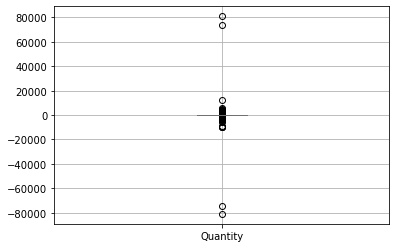

In [48]:
df.boxplot('Quantity')

<AxesSubplot:>

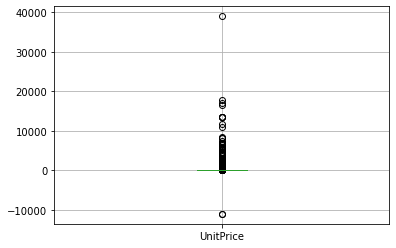

In [49]:
df.boxplot('UnitPrice')

<AxesSubplot:>

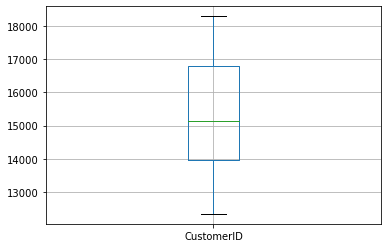

In [50]:
df.boxplot('CustomerID')

### b. Histogram – All Numeric Variables 


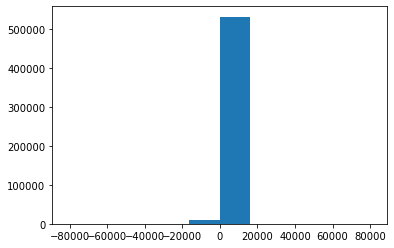

In [51]:
plt.hist(df["Quantity"])
plt.show()

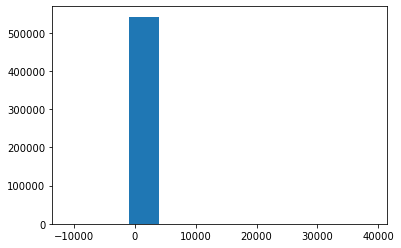

In [52]:
plt.hist(df['UnitPrice'])
plt.show()

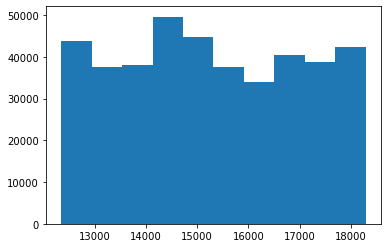

In [53]:
plt.hist(df['CustomerID'])
plt.show()

### c. Distribution Plot – All Numeric Variables 

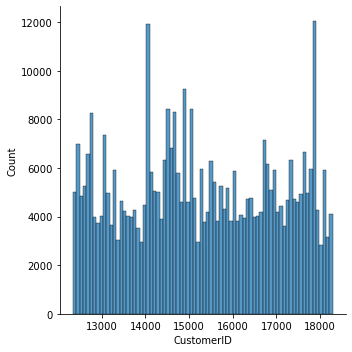

In [54]:
sns.displot(df.CustomerID)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


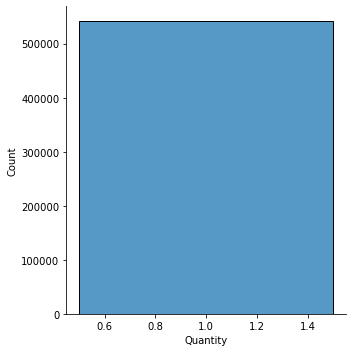

In [55]:
sns.displot(df['Quantity'].notnull())

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


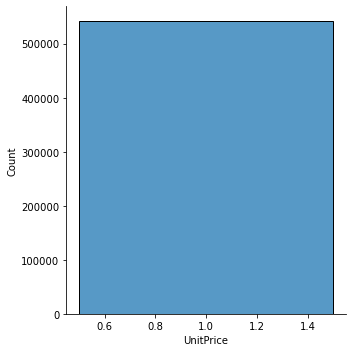

In [56]:
sns.displot(df['UnitPrice'].notnull())

### d. Aggregation for all numerical Columns 


In [57]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### e. Unique Values across all columns

In [58]:
for i in df:
    print(df[i].unique())


['536365' '536366' '536367' ... '581585' '581586' '581587']
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -2

### f. Duplicate values across all columns

In [59]:
for i in df:
    print(df[i][df[i].duplicated()])


1         536365
2         536365
3         536365
4         536365
5         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 516009, dtype: object
47         22632
48         22633
49        85123A
50         71053
51        84406B
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: StockCode, Length: 537839, dtype: object
47                 HAND WARMER RED POLKA DOT
48                    HAND WARMER UNION JACK
49        WHITE HANGING HEART T-LIGHT HOLDER
50                       WHITE METAL LANTERN
51            CREAM CUPID HEARTS COAT HANGER
                         ...                
541904           PACK OF 20 SPACEBOY NAPKINS
541905          CHILDREN'S APRON DOLLY GIRL 
541906         CHILDRENS CUTLERY DOLLY GIRL 
541907       CHILDRENS CUTLERY CIRCUS PARADE
541908         BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 537685, dt

### g. Correlation – Heatmap - All Numeric Variables 


<AxesSubplot:>

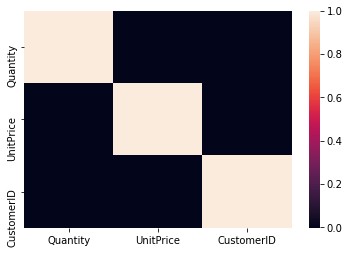

In [60]:
sns.heatmap(df.corr())

### h. Regression Plot - All Numeric Variables 


(0.0, 50000.0)

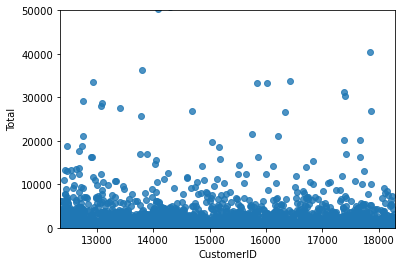

In [61]:
# sns.regplot(x=df['CustomerID'],y=(df['Quantity']*df['UnitPrice']))
# av=df.groupby(['CustomerID','InvoiceNo']).Quantity.count().reset_index()
df7=df.copy()
df7['Total']=df7['Quantity']*df7['UnitPrice']
av=df7.groupby(['CustomerID','InvoiceNo']).Total.sum().reset_index()
av1=av.groupby('CustomerID').Total.sum().reset_index()

ed=sns.regplot(x=av1['CustomerID'],y=av1['Total'])
ed.set_ylim(0,50000)

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable 


<AxesSubplot:xlabel='CustomerID', ylabel='Country'>

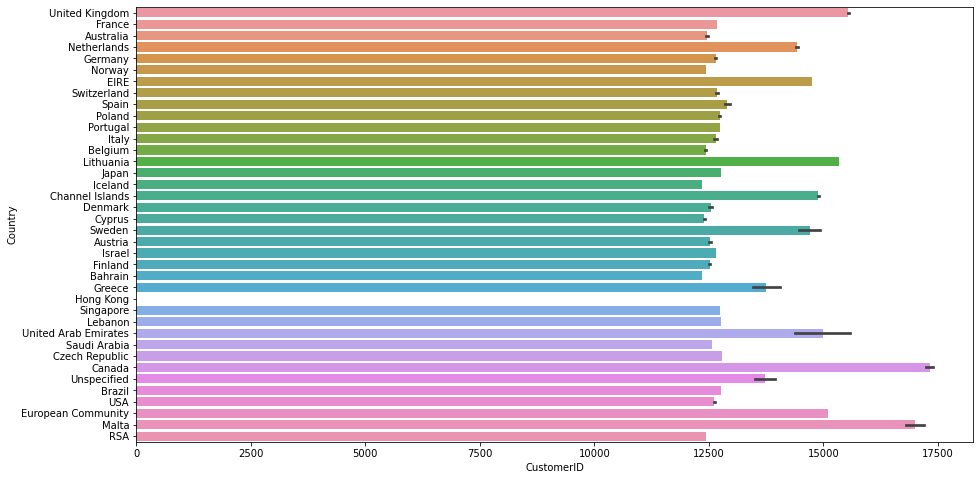

In [62]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['CustomerID'],y=df['Country'])

### k. Line chart to show the trend of data - All Numeric/Date Variables

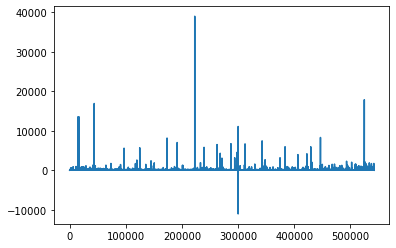

In [63]:
plt.plot(df['UnitPrice'])
plt.show()

### Check for missing values in all columns and replace them with the appropriate metric 


In [64]:
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [65]:
df['Description'].fillna(df['Description'].mode()[0], inplace=True)

### 3. Remove duplicate rows

In [66]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### 4. Remove rows which have negative values in Quantity column 


In [67]:
df.drop(df[(df['Quantity'] <= 0)].index,inplace=True)


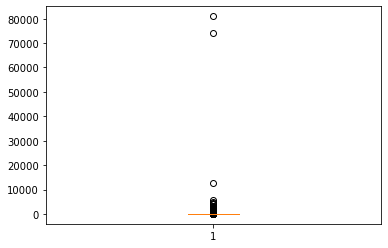

In [68]:
plt.boxplot(df['Quantity'])
plt.show()

### 5. Add the columns - Month, Day and Hour for the invoice 


In [69]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Year']=df['InvoiceDate'].dt.year
df['Hour']=df['InvoiceDate'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  531285 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
 8   Month        531285 non-null  int64         
 9   Day          531285 non-null  int64         
 10  Year         531285 non-null  int64         
 11  Hour         531285 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 52.7+ MB


### 6. How many orders made by the customers? 

In [70]:
all_orders=df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
all_orders.InvoiceNo.sum()

397924

### 7. TOP 5 customers with higher number of orders 


In [71]:
all_orders.sort_values(by=['InvoiceNo'], ascending=False).head()

,CustomerID,InvoiceNo
4011,17841.0,7847
1880,14911.0,5677
1290,14096.0,5111
326,12748.0,4596
1662,14606.0,2700


### 8. How much money spent by the customers? 

In [72]:
df['Amount_Spent'] = df['Quantity'] * df['UnitPrice']
total_spent=df['Amount_Spent'].sum()
print('money spent by the customers',total_spent)

money spent by the customers 10644560.424


### 9. TOP 5 customers with highest money spent 


In [73]:
top5_spenders = df.groupby(by=['CustomerID'], as_index=False)['Amount_Spent'].sum()
top5_spenders.sort_values(by='Amount_Spent', ascending=False).head()

,CustomerID,Amount_Spent
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194550.79
3009,16446.0,168472.50
1880,14911.0,143825.06


### 10. How many orders per month? 


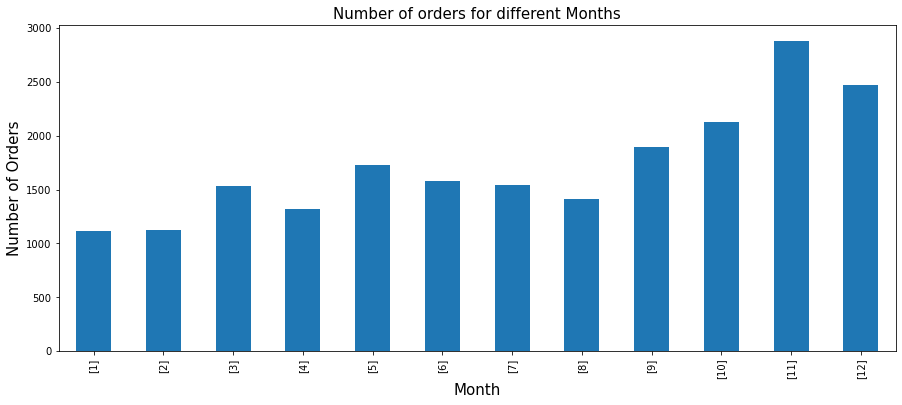

In [74]:
ax = df.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months',fontsize=15)

plt.show()

### 11. How many orders per day?

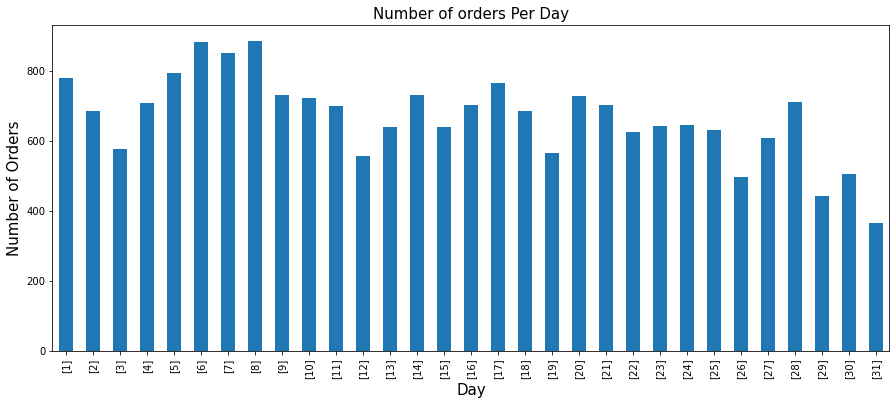

In [75]:
ax = df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders Per Day',fontsize=15)

plt.show()

### 12. How many orders per hour? 


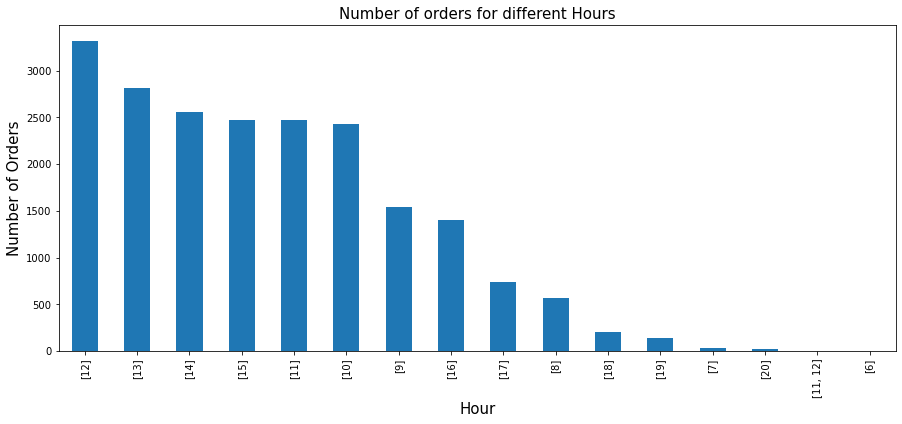

In [76]:
ax= df.groupby('InvoiceNo')["Hour"].unique().value_counts().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)

plt.show()

### How many orders for each country?

<AxesSubplot:xlabel='InvoiceNo', ylabel='Country'>

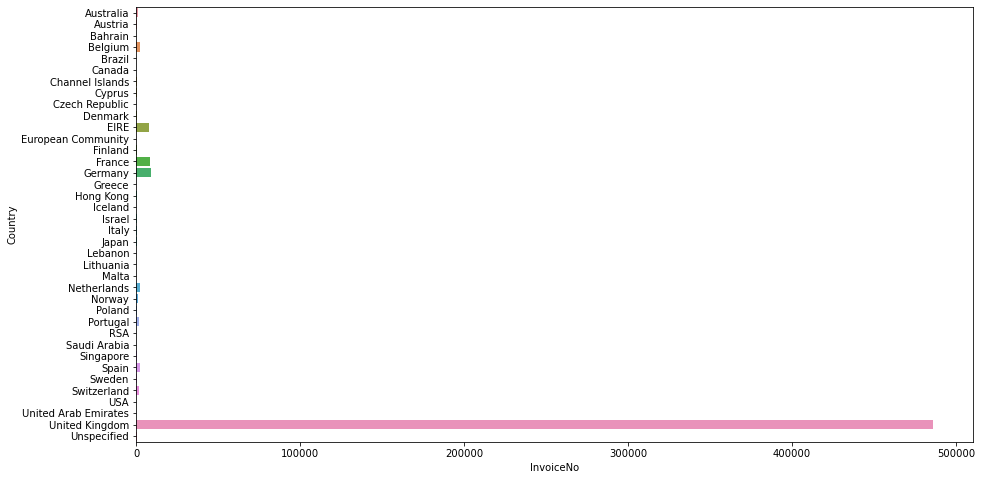

In [77]:
plt.figure(figsize=(15,8))
country_orders=df.groupby(by=['Country'], as_index=False)['InvoiceNo'].count()
sns.barplot(x=country_orders['InvoiceNo'],y=country_orders['Country'])
    